# Roman Ulymov Maksimovich 244-2,
# Youth smoking and drug dataset analisys.

# Aims:

1. Figure out why youth(and also senior) drug and smoking addictions happen.

2. Find any possible solutions to these problems.

3. Also find other interesting connectivities between given variables.

# What was I working with.

This dataset is from kaggle: https://www.kaggle.com/datasets/waqi786/youth-smoking-and-drug-dataset

Let's get started.

# 1. Data cleanup.

First thing that we should check is whether data is cleaned or it isn't.

It has 10 Usability points, so there must be almost 0 NaN objects. 

But firstly we need to import some libraries.

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Then we read the dataset and check the situation.

In [9]:
data = pd.read_csv('youth_smoking_drug_data_10000_rows_expanded.csv')

In [10]:
print(data.isnull().sum())

Year                    0
Age_Group               0
Gender                  0
Smoking_Prevalence      0
Drug_Experimentation    0
Socioeconomic_Status    0
Peer_Influence          0
School_Programs         0
Family_Background       0
Mental_Health           0
Access_to_Counseling    0
Parental_Supervision    0
Substance_Education     0
Community_Support       0
Media_Influence         0
dtype: int64


The data is clean.

# 2. Work with data.

Firstly I transformed some columns in dataset for plot functions having less troubles in visualising.

1. Age_Group.

What we have by now:

In [11]:
print(data['Age_Group'])

0       15-19
1       10-14
2       10-14
3       40-49
4       15-19
        ...  
9995    15-19
9996      80+
9997    25-29
9998    40-49
9999    10-14
Name: Age_Group, Length: 10000, dtype: object


In [12]:
data['Age_Group'] = data['Age_Group'].apply(lambda x: 80 if x[-1] == '+' else int(x[-2:]))

I used lambda function to cut initially string objects from the right side and make integers out of them.

And now we have:

In [13]:
print(data['Age_Group'])

0       19
1       14
2       14
3       49
4       19
        ..
9995    19
9996    80
9997    29
9998    49
9999    14
Name: Age_Group, Length: 10000, dtype: int64


2. Drug_Experimentation and Smoking_Prevalence.

In [20]:
print(data['Smoking_Prevalence'])
print(data['Drug_Experimentation'])

0       19
1       35
2       42
3       34
4       48
        ..
9995    49
9996    48
9997    48
9998     9
9999    44
Name: Smoking_Prevalence, Length: 10000, dtype: int64
0       32
1       42
2       57
3       43
4       40
        ..
9995    10
9996    31
9997    40
9998    12
9999    22
Name: Drug_Experimentation, Length: 10000, dtype: int64


They are float objects so I just used round() to each of them.

In [14]:
data["Drug_Experimentation"] = data["Drug_Experimentation"].apply(lambda x: round(x))
data["Smoking_Prevalence"] = data["Smoking_Prevalence"].apply(lambda x: round(x))

3. Socioeconomic_Status.

In [21]:
print(data['Socioeconomic_Status'])

0       3
1       3
2       3
3       2
4       3
       ..
9995    1
9996    2
9997    3
9998    1
9999    3
Name: Socioeconomic_Status, Length: 10000, dtype: int64


In [15]:
data['Socioeconomic_Status'] = data['Socioeconomic_Status'].apply(lambda x: 3 if x == 'High' else 2 if x == 'Middle' else 1)

We need to do this for later plots.

In [22]:
print(data['Socioeconomic_Status'])

0       3
1       3
2       3
3       2
4       3
       ..
9995    1
9996    2
9997    3
9998    1
9999    3
Name: Socioeconomic_Status, Length: 10000, dtype: int64


There are some statistics about the most important columns:

In [55]:
print('Smoking Prevalence:')
print(data['Smoking_Prevalence'].describe())
print('Drug Experimentation:')
print(data['Drug_Experimentation'].describe())
print('Age Group:')
print(data['Age_Group'].describe())
print('Smoking_Prevalence median: ', data['Smoking_Prevalence'].median())
print('Drug_Experimentation median:', data['Drug_Experimentation'].median())
print('Age_Group median:', data['Age_Group'].median())

Smoking Prevalence:
count    10000.000000
mean        27.438900
std         12.986644
min          5.000000
25%         16.000000
50%         27.000000
75%         39.000000
max         50.000000
Name: Smoking_Prevalence, dtype: float64
Drug Experimentation:
count    10000.000000
mean        40.147400
std         17.527224
min         10.000000
25%         25.000000
50%         40.000000
75%         55.000000
max         70.000000
Name: Drug_Experimentation, dtype: float64
Age Group:
count    10000.000000
mean        45.741900
std         23.406227
min         14.000000
25%         24.000000
50%         39.000000
75%         69.000000
max         80.000000
Name: Age_Group, dtype: float64
Smoking_Prevalence median:  27.0
Drug_Experimentation median: 40.0
Age_Group median: 39.0


In [19]:
print(data.groupby('Gender').size())
print(data.groupby('Socioeconomic_Status').size())
print(data.groupby('School_Programs').size())
print(data.groupby('Access_to_Counseling').size())

Gender
Both      3415
Female    3291
Male      3294
dtype: int64
Socioeconomic_Status
1    3292
2    3344
3    3364
dtype: int64
School_Programs
No     5041
Yes    4959
dtype: int64
Access_to_Counseling
No     5085
Yes    4915
dtype: int64


As we can see, the dataset is pretty balanced, so I think we can start the analisys.

# 3. Hypotheses, their checks and other analytics.

The first thing i really wanted to check is gender analytics. Who is actually more addictive?

In [25]:
print(data.pivot_table(['Drug_Experimentation'], ['Gender'], aggfunc='mean'))
print(data.pivot_table(['Smoking_Prevalence'], ['Gender'], aggfunc='mean'))

        Drug_Experimentation
Gender                      
Both               40.478770
Female             40.141902
Male               39.809350
        Smoking_Prevalence
Gender                    
Both             27.571596
Female           27.391067
Male             27.349120


The result is that males and females are almost equally addictive, even though males are slightly lower in average.

I think building plots about almost equivelent data is unnessesary, so let's check the dependence of age group and drug experimentation(and also smoking prevalence).

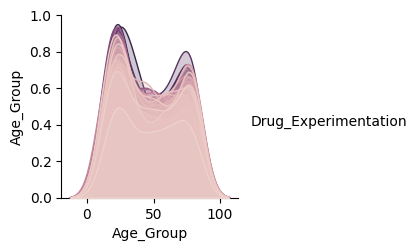

In [26]:
sns.pairplot(data=data, hue = 'Drug_Experimentation',  vars = ['Age_Group'])
plt.show()

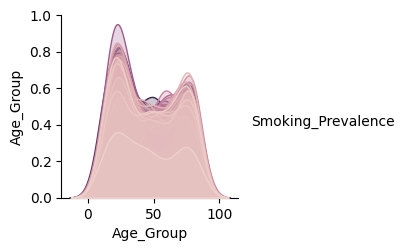

In [27]:
sns.pairplot(data=data, hue = 'Smoking_Prevalence',  vars = ['Age_Group'])
plt.show()

As we can see, the most addictive age groups are young and senior ones. We need to focus on them more. 

Another factor is Socioeconomic Status. Let's anylise it.

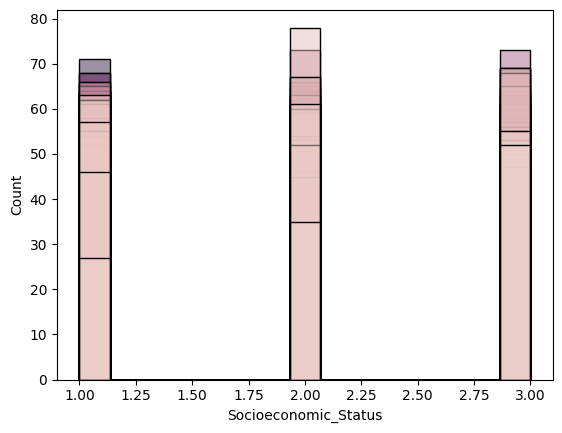

In [32]:
sns.histplot(x="Socioeconomic_Status", hue="Drug_Experimentation" ,data=data, legend=False)
plt.show()

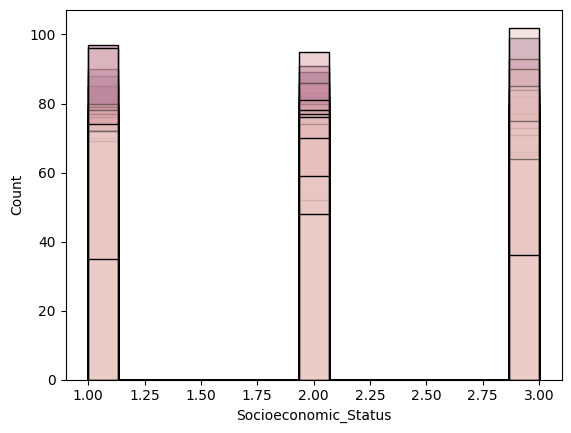

In [33]:
sns.histplot(x="Socioeconomic_Status", hue="Smoking_Prevalence" ,data=data, legend=False)
plt.show()

As we can see, High class is the leader in smoking category while Middle class in more addictive to drugs.

Now I want to add Socioeconomic Status to the first plot as a third variable and see what happens:

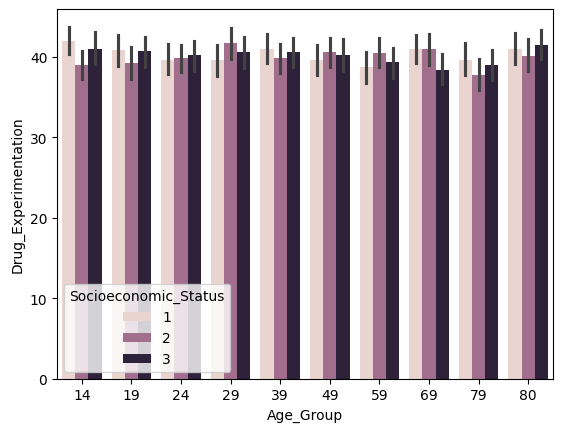

In [34]:
sns.barplot(data=data, x = "Age_Group", y = "Drug_Experimentation", hue = "Socioeconomic_Status")
plt.show()

At the start we have poor young people being very addictive, then in middle ages Middle class takes the leadership and finally, very old rich people become the most prone to experiments with drugs.

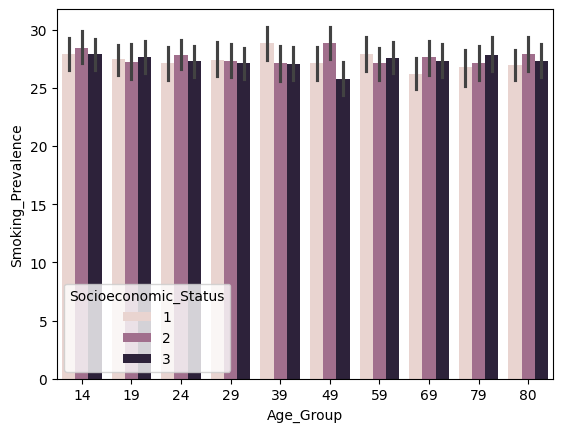

In [35]:
sns.barplot(data=data, x = "Age_Group", y = "Smoking_Prevalence", hue = "Socioeconomic_Status")
plt.show()

The smoking situation is different. Here, almost everywhere Middle class is dominating over others.

Let's look on the parential supervision situation and find out how it affects smoking and drug addictions.

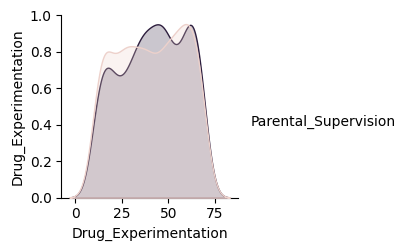

In [28]:
test = data[data['Parental_Supervision'].isin([1, 10])]
sns.pairplot(vars = ["Drug_Experimentation"], hue = 'Parental_Supervision',data=test)
plt.show()

Here we can see that overlooked by parents middle-age guys are very addictive, it also concerns underlooked young people.

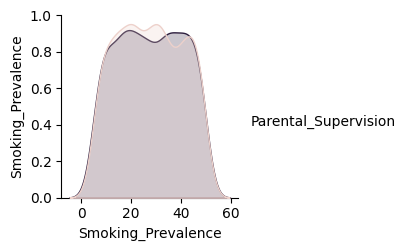

In [29]:
sns.pairplot(vars = ["Smoking_Prevalence"], hue = 'Parental_Supervision',data=test)
plt.show()

This graph shows the opposite situation for middle-age people, but underlooked young and overlooked senior people like to smoke.

Then I observed how Mental Health is connected to drugs and smoking.

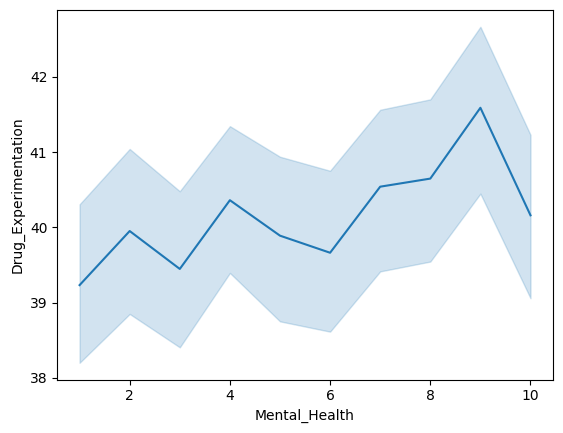

In [36]:
sns.lineplot(data=data, x = "Mental_Health", y = "Drug_Experimentation")
plt.show()

The result: The happier the people, the more they experiment.

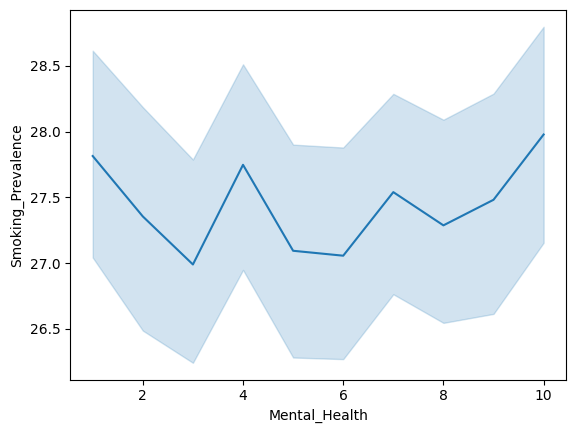

In [37]:
sns.lineplot(data=data, x = "Mental_Health", y = "Smoking_Prevalence")
plt.show()

Here unhappy and happy people smoke the most.

Let's check the theory about media influence connected with age groups.

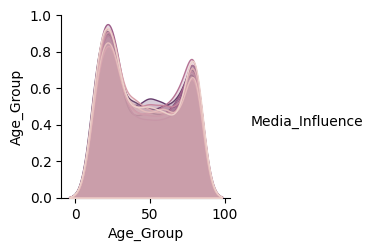

In [38]:
sns.pairplot(data=data,hue = "Media_Influence", vars=["Age_Group"])
plt.show()

Result: Young and senior people are very prone to influence from the media.

# 4. Data transformation.

Let's add two more columns based on the existing information.

The first one will be about Addiction type of a person.

In [39]:
new_d = data.copy()
new_d['Drug_Experimentation'] = new_d['Drug_Experimentation'].apply(lambda x: round(x * 5/7))

The lambda function is for coefficient equality between Drug_Experimentation and Smoking_Prevalence.

Then find out the average difference between the coefficients of addiction to drugs and smoking.

In [40]:
new_d['Diff'] = new_d.apply(lambda x: abs(x['Smoking_Prevalence'] - x['Drug_Experimentation']), axis=1)
print(new_d['Diff'].mean())

14.7355


Creating a new column with the type of addictions, there are 4 of them in total (Smoking, drugs, equal and mostly healthy).

In [41]:
new_d["Addiction_Type"] = new_d.apply(lambda x: "Smoking" if ((x['Smoking_Prevalence'] - x['Drug_Experimentation']) > 15) else "Drugs" if ((x['Drug_Experimentation'] - x['Smoking_Prevalence']) > 15) else "Healty" if ((x['Smoking_Prevalence'] < 10) and (x['Drug_Experimentation'] < 10)) else "Equal", axis=1)

In [42]:
print(new_d.groupby('Addiction_Type').size())

Addiction_Type
Drugs      2292
Equal      5694
Healty       55
Smoking    1959
dtype: int64


Looks equal enough, then we delete the unnecessary df.

In [43]:
data["Addiction_Type"] = new_d["Addiction_Type"]
del new_d

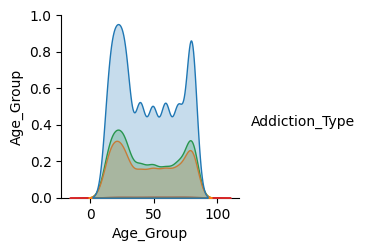

In [44]:
sns.pairplot(hue = 'Addiction_Type', vars = ["Age_Group"], data=data)
plt.show()

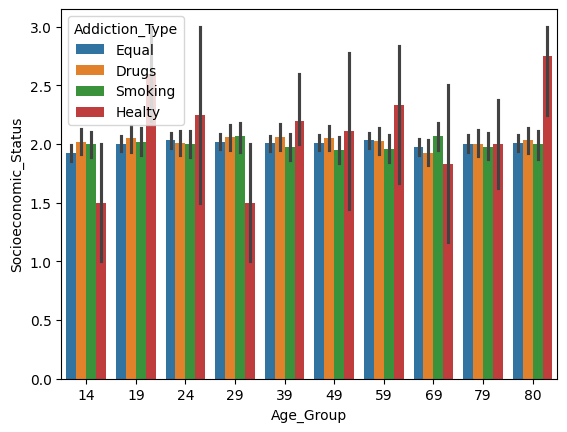

In [45]:
sns.barplot(data=data, x = "Age_Group", y = "Socioeconomic_Status", hue = "Addiction_Type")
plt.show()

It's important to notice that small number of healthy people for the most part are rich.

Another factor I called Quality_Of_Life. It shows how different levels of mental health, economic status and school programs affect addictions.

In [51]:
data['Quality_Of_Life'] = data.apply(lambda x: 'Excellent' if ((x['Mental_Health'] >= 8) and (x['School_Programs'] == 'Yes')) else 'Low' if ((x['Mental_Health'] < 5) and (x['School_Programs'] == 'No')) else 'Mid', axis=1)
print(data.groupby('Quality_Of_Life').size())

Quality_Of_Life
Excellent    1477
Low          2045
Mid          6478
dtype: int64


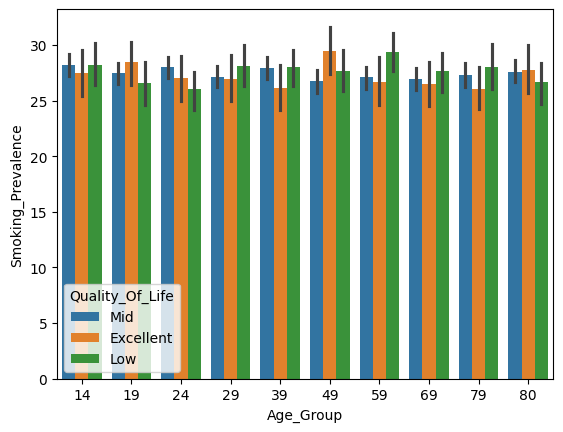

In [52]:
sns.barplot(data=data, x = "Age_Group", y = "Smoking_Prevalence", hue = "Quality_Of_Life")
plt.show()

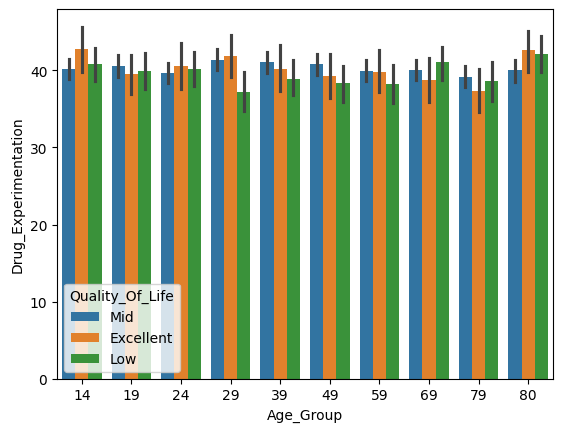

In [48]:
sns.barplot(data=data, x = "Age_Group", y = "Drug_Experimentation", hue = "Quality_Of_Life")
plt.show()

As we can see, school and mental health is not the best protection from drug and smoking addictions.

# 5. Results.

So,

1. The most insecure age groups are young and old people. They are more likely to experiment with drugs and smoking under media influnce, overlooked by relatives old people are as addictive as underlooked youth. Without parent's supervision rich young people start to experiment with drugs, so this problem should be solved.

2. Middle-age people is not so affected by media, but their mental health is the reason why they choose ciggarets. 

3. Talking about socioeconomic status, middle class is weak to smoking, while low and high ones are sensitive to drugs. It's important to notice, that small number of healthy people are from high class.